In [1]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

from netCDF4 import Dataset
data = Dataset("data/gistemp250_GHCNv4.nc")


In [28]:
from netCDF4 import date2index
from datetime import datetime

timeindex = date2index(datetime(2019, 1, 15), data.variables["time"])

In [29]:
lat = data.variables["lat"][:]
lon = data.variables["lon"][:]
lon, lat = np.meshgrid(lon, lat)
temp_anomaly = data.variables["tempanomaly"][timeindex]

/home/jose/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


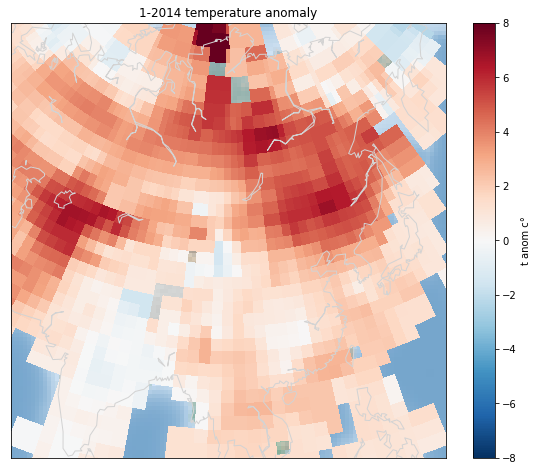

In [30]:
fig = plt.figure(figsize=(10, 8))
m = Basemap(projection="lcc", resolution="c", width=8E6, height=8E6, lat_0=45, lon_0=100)
m.shadedrelief(scale=0.05)
m.pcolormesh(lon, lat, temp_anomaly, latlon=True, cmap="RdBu_r")
plt.clim(-8, 8)
m.drawcoastlines(color="lightgray")

plt.title("1-2019 temperature anomaly")
plt.colorbar(label="t anom c°")